# This Data is from the World Health Organisation daily situation reports from around the world.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

# Question: Investigate the relationship between total COVID-19 cases, new cases and deaths in the UK

In [76]:
df_original = pd.read_csv('who-situation-reports-covid-19.csv')
df_original.head()

,reported_date,reporting_country_territory,province_city,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,transmission_classification,total_cases_with_travel_history_to_china,new_cases_with_travel_history_to_china,...,daily_clinically_diagnosed_cases,daily_total_cases,cumulative_total_cases,cumulative_lab_confirmed_cases,cumulative_clinically_diagnosed_cases,cumulative_deaths,days_since_last_reported,who_region,population,report_url
0,2020-04-05,China,NaN,82875,73.0,3335.0,4.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
1,2020-04-05,Republic of Korea,NaN,10156,94.0,177.0,3.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
2,2020-04-05,Australia,NaN,5454,230.0,28.0,5.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
3,2020-04-05,Malaysia,NaN,3333,217.0,53.0,3.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
4,2020-04-05,Philippines,NaN,3018,385.0,136.0,29.0,Local transmission,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...


In [77]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7758 entries, 0 to 7757
Data columns (total 33 columns):
reported_date                                                        7758 non-null object
reporting_country_territory                                          7758 non-null object
province_city                                                        1547 non-null object
confirmed_cases                                                      7758 non-null object
new_confirmed_cases                                                  7043 non-null float64
total_deaths                                                         7123 non-null float64
new_total_deaths                                                     6994 non-null float64
transmission_classification                                          5310 non-null object
total_cases_with_travel_history_to_china                             399 non-null float64
new_cases_with_travel_history_to_china                               340 non-nul

In [78]:
df_original.reporting_country_territory.unique()

array(['China', 'Republic of Korea', 'Australia', 'Malaysia',
       'Philippines', 'Japan', 'Singapore', 'New Zealand', 'Viet Nam',
       'Brunei Darussalam', 'Cambodia', 'Mongolia',
       'Lao People’s Democratic Republic', 'Fiji', 'Papua New Guinea',
       'Guam', 'French Polynesia', 'New Caledonia', 'Northern Mariana',
       'Italy', 'Spain', 'Germany', 'France', 'United Kingdom', 'Turkey',
       'Switzerland', 'Belgium', 'Netherlands', 'Austria', 'Portugal',
       'Israel', 'Sweden', 'Norway', 'Ireland', 'Czechia',
       'Russian Federation', 'Denmark', 'Poland', 'Romania', 'Luxembourg',
       'Finland', 'Greece', 'Serbia', 'Iceland', 'Ukraine', 'Croatia',
       'Estonia', 'Slovenia', 'Lithuania', 'Armenia', 'Hungary',
       'Republic of Moldova', 'Bosnia and Herzegovina', 'Latvia',
       'Bulgaria', 'Kazakhstan', 'Slovakia', 'Azerbaijan', 'Andorra',
       'North Macedonia', 'Cyprus', 'Albania', 'Belarus', 'San Marino',
       'Uzbekistan', 'Malta', 'Montenegro', 'Geor

## Select the Columns for further investigation

In [79]:
df_original.columns

Index(['reported_date', 'reporting_country_territory', 'province_city',
       'confirmed_cases', 'new_confirmed_cases', 'total_deaths',
       'new_total_deaths', 'transmission_classification',
       'total_cases_with_travel_history_to_china',
       'new_cases_with_travel_history_to_china',
       'total_cases_with_possible_or_confirmed_transmission_outside_china',
       'new_cases_with_possible_or_confirmed_transmission_outside_china',
       'total_cases_with_site_of_transmission_under_investigation',
       'new_cases_with_site_of_transmission_under_investigation',
       'place_of_exposure_in_china_cases',
       'place_of_exposure_in_china_cases_new',
       'place_of_exposure_outside_reporting_country_and_china_cases',
       'place_of_exposure_outside_reporting_country_and_china_cases_new',
       'place_of_exposure_in_reporting_country_cases',
       'place_of_exposure_in_reporting_country_cases_new', 'suspected_cases',
       'daily_suspected_cases', 'daily_lab_confirmed_c

In [80]:
df = df_original[['reported_date', 'reporting_country_territory', 'confirmed_cases', 'new_confirmed_cases', 'total_deaths', 'new_total_deaths']]

In [81]:
df.head()

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
0,2020-04-05,China,82875,73.0,3335.0,4.0
1,2020-04-05,Republic of Korea,10156,94.0,177.0,3.0
2,2020-04-05,Australia,5454,230.0,28.0,5.0
3,2020-04-05,Malaysia,3333,217.0,53.0,3.0
4,2020-04-05,Philippines,3018,385.0,136.0,29.0


In [82]:
df.iloc[0]

reported_date                  2020-04-05
reporting_country_territory         China
confirmed_cases                     82875
new_confirmed_cases                    73
total_deaths                         3335
new_total_deaths                        4
Name: 0, dtype: object

In [83]:
df.iloc[0:3]

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
0,2020-04-05,China,82875,73.0,3335.0,4.0
1,2020-04-05,Republic of Korea,10156,94.0,177.0,3.0
2,2020-04-05,Australia,5454,230.0,28.0,5.0


# Data Cleaning

## Get UK Stats and reset the index

In [84]:
uk_stats = df[df.reporting_country_territory == 'United Kingdom']
uk_stats.reset_index(inplace=True, drop=True)
uk_stats.head()

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
0,2020-04-05,United Kingdom,38172,4450.0,3605.0,684.0
1,2020-04-04,United Kingdom,33722,4244.0,2921.0,389.0
2,2020-04-03,United Kingdom,294784324,2532.0,743.0,0.0
3,2020-04-02,United Kingdom,22145,2619.0,1408.0,180.0
4,2020-04-01,United Kingdom,22145,2619.0,1408.0,180.0


### Note - The Dates are not in order. First change the date type to DateTime and can sort by decending order (newest first) easier later

## Rectify the Date - Change Data Type from Object to DateTime

In [85]:
uk_stats.reported_date.dtype

dtype('O')

In [86]:
temp_df = pd.DataFrame()
temp_df['new_date'] = pd.to_datetime(uk_stats['reported_date'], format='%Y-%m-%d')
temp_df.head()

,new_date
0,2020-04-05
1,2020-04-04
2,2020-04-03
3,2020-04-02
4,2020-04-01


In [87]:
temp_df.new_date.dtype

dtype('<M8[ns]')

### Concat the new date format column to the uk_stats df and remove the old date column

In [88]:
uk_stats = pd.concat([uk_stats, temp_df], axis=1)
uk_stats.head()

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,new_date
0,2020-04-05,United Kingdom,38172,4450.0,3605.0,684.0,2020-04-05
1,2020-04-04,United Kingdom,33722,4244.0,2921.0,389.0,2020-04-04
2,2020-04-03,United Kingdom,294784324,2532.0,743.0,0.0,2020-04-03
3,2020-04-02,United Kingdom,22145,2619.0,1408.0,180.0,2020-04-02
4,2020-04-01,United Kingdom,22145,2619.0,1408.0,180.0,2020-04-01


In [89]:
uk_stats = uk_stats[['new_date','reporting_country_territory', 'confirmed_cases',
       'new_confirmed_cases', 'total_deaths', 'new_total_deaths']]

uk_stats.head()

,new_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
0,2020-04-05,United Kingdom,38172,4450.0,3605.0,684.0
1,2020-04-04,United Kingdom,33722,4244.0,2921.0,389.0
2,2020-04-03,United Kingdom,294784324,2532.0,743.0,0.0
3,2020-04-02,United Kingdom,22145,2619.0,1408.0,180.0
4,2020-04-01,United Kingdom,22145,2619.0,1408.0,180.0


## Reorganisation of Data

### Make each row an observationa and each column an individual variable

In [90]:
df_reorg = pd.melt(frame=uk_stats,
             id_vars = ['new_date', 'reporting_country_territory'],
             value_vars=['confirmed_cases', 'new_confirmed_cases', 'total_deaths', 'new_total_deaths'],
             value_name="Number", var_name="Type_ofCase")
df_reorg.head()

,new_date,reporting_country_territory,Type_ofCase,Number
0,2020-04-05,United Kingdom,confirmed_cases,38172
1,2020-04-04,United Kingdom,confirmed_cases,33722
2,2020-04-03,United Kingdom,confirmed_cases,294784324
3,2020-04-02,United Kingdom,confirmed_cases,22145
4,2020-04-01,United Kingdom,confirmed_cases,22145


# Check for NaN values:

In [91]:
is_NaN = df_reorg.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_reorg[row_has_NaN]
rows_with_NaN

,new_date,reporting_country_territory,Type_ofCase,Number
123,2020-02-03,United Kingdom,new_confirmed_cases,NaN
124,2020-02-04,United Kingdom,new_confirmed_cases,NaN
125,2020-02-05,United Kingdom,new_confirmed_cases,NaN
126,2020-02-01,United Kingdom,new_confirmed_cases,NaN
127,2020-02-02,United Kingdom,new_confirmed_cases,NaN
190,2020-02-01,United Kingdom,total_deaths,NaN
191,2020-02-02,United Kingdom,total_deaths,NaN
238,2020-02-06,United Kingdom,new_total_deaths,NaN
251,2020-02-03,United Kingdom,new_total_deaths,NaN
252,2020-02-04,United Kingdom,new_total_deaths,NaN


## Drop the suspected error number in index 2 of df_reorg

In [92]:
df_reorg = df_reorg.drop(df_reorg.index[[2]])
df_reorg.reset_index(drop=True, inplace=True)
df_reorg.head()

,new_date,reporting_country_territory,Type_ofCase,Number
0,2020-04-05,United Kingdom,confirmed_cases,38172
1,2020-04-04,United Kingdom,confirmed_cases,33722
2,2020-04-02,United Kingdom,confirmed_cases,22145
3,2020-04-01,United Kingdom,confirmed_cases,22145
4,2020-03-31,United Kingdom,confirmed_cases,19526


## The NaN values can be assumed as 0 as it was at the beggining of the outbreak and there were no cases in the UK at that time

### Replace NaN with 0

In [93]:
df_reorg.Number = df_reorg.Number.fillna(value=0)

## Make the Number column numeric instead of an object

In [94]:
df_reorg.Number = pd.to_numeric(df_reorg.Number)
df_reorg.Number.dtype

dtype('float64')

## Start of Data Extraction

### Function to parse the required data
#### Note - The Dates were not sorted and need sorting into decending (newest first) order

In [95]:
def get_country_info(country, type_of_case):
    df = df_reorg[(df_reorg.reporting_country_territory == country) & (df_reorg.Type_ofCase == type_of_case )]
    df.reset_index(drop=True, inplace=True)
    
    df_sorted = df.sort_values(by=['new_date'], ascending=False)
    df_sorted.reset_index(drop=True, inplace=True)
    return df_sorted

### UK Confirmed Cases 2 Feb - 5 Apr 2020

In [96]:
uk_confirmed = get_country_info('United Kingdom', 'confirmed_cases')
uk_confirmed.head()

,new_date,reporting_country_territory,Type_ofCase,Number
0,2020-04-05,United Kingdom,confirmed_cases,38172.0
1,2020-04-04,United Kingdom,confirmed_cases,33722.0
2,2020-04-02,United Kingdom,confirmed_cases,22145.0
3,2020-04-01,United Kingdom,confirmed_cases,22145.0
4,2020-03-31,United Kingdom,confirmed_cases,19526.0


### UK Newly Confirmed Cases 2 Feb - 5 Apr 2020

In [97]:
uk_new_confirmed = get_country_info('United Kingdom', 'new_confirmed_cases')
uk_new_confirmed.head()

,new_date,reporting_country_territory,Type_ofCase,Number
0,2020-04-05,United Kingdom,new_confirmed_cases,4450.0
1,2020-04-04,United Kingdom,new_confirmed_cases,4244.0
2,2020-04-03,United Kingdom,new_confirmed_cases,2532.0
3,2020-04-02,United Kingdom,new_confirmed_cases,2619.0
4,2020-04-01,United Kingdom,new_confirmed_cases,2619.0


### UK Total Deaths 2 Feb - 5 Apr 2020

In [99]:
uk_total_deaths = get_country_info('United Kingdom', 'total_deaths')
uk_total_deaths.head()

,new_date,reporting_country_territory,Type_ofCase,Number
0,2020-04-05,United Kingdom,total_deaths,3605.0
1,2020-04-04,United Kingdom,total_deaths,2921.0
2,2020-04-03,United Kingdom,total_deaths,743.0
3,2020-04-02,United Kingdom,total_deaths,1408.0
4,2020-04-01,United Kingdom,total_deaths,1408.0


### UK New Total Deaths per Day  2 Feb - 5 Apr 2020

In [98]:
uk_new_total_deaths = get_country_info('United Kingdom', 'new_total_deaths')
uk_new_total_deaths.head()

,new_date,reporting_country_territory,Type_ofCase,Number
0,2020-04-05,United Kingdom,new_total_deaths,684.0
1,2020-04-04,United Kingdom,new_total_deaths,389.0
2,2020-04-03,United Kingdom,new_total_deaths,0.0
3,2020-04-02,United Kingdom,new_total_deaths,180.0
4,2020-04-01,United Kingdom,new_total_deaths,180.0


## Graph plotting the results

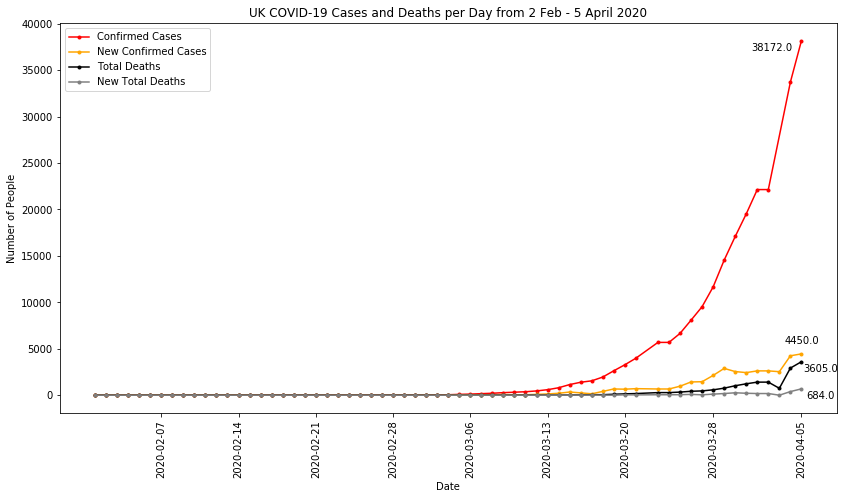

In [185]:
plt.figure(figsize=(12,6))
plt.plot(uk_confirmed.new_date, uk_confirmed.Number, 'r.-', label='Confirmed Cases')
plt.plot(uk_new_confirmed.new_date, uk_new_confirmed.Number, '.-', color='orange', label='New Confirmed Cases')
plt.plot(uk_total_deaths.new_date, uk_total_deaths.Number, 'k.-', label='Total Deaths')
plt.plot(uk_new_total_deaths.new_date, uk_new_total_deaths.Number, '.-', color='grey', label='New Total Deaths')
plt.tight_layout()
plt.xticks(uk_confirmed.new_date[::7],rotation='vertical')
plt.title('UK COVID-19 Cases and Deaths per Day from 2 Feb - 5 April 2020')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.annotate(uk_confirmed.Number[0], (uk_confirmed.new_date[0], uk_confirmed.Number[0]), textcoords="offset points", xytext=(-30,-10), ha=('center'))
plt.annotate(uk_new_confirmed.Number[0], (uk_new_confirmed.new_date[0], uk_new_confirmed.Number[0]), textcoords="offset points", xytext=(0,10), ha=('center'))
plt.annotate(uk_total_deaths.Number[0], (uk_total_deaths.new_date[0], uk_total_deaths.Number[0]), textcoords="offset points", xytext=(19,-10), ha=('center'))
plt.annotate(uk_new_total_deaths.Number[0], (uk_new_total_deaths.new_date[0], uk_new_total_deaths.Number[0]), textcoords="offset points", xytext=(19,-10), ha=('center'))
plt.legend()
plt.show()